In [55]:
import io
import json
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_json('/content/drive/MyDrive/M3/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
df = df.drop('article_link', axis = 1)

In [7]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [8]:
df.shape

(28619, 2)

In [9]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [12]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [13]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [14]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


In [15]:
from wordcloud import WordCloud

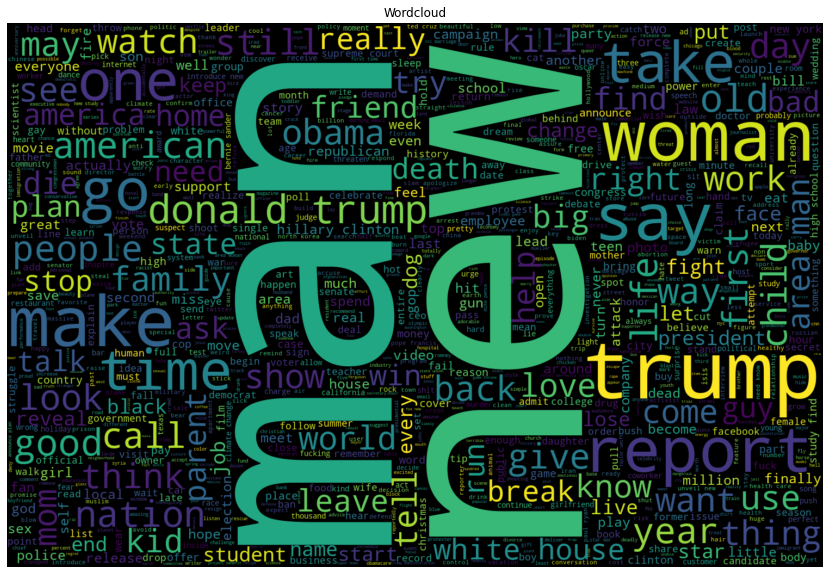

In [16]:
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [18]:
#split into features and label
X = df['clean_text']
y = df['is_sarcastic']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [20]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [21]:
X_train.head()

12170    american express offer month paternity materni...
28552       watch dolphin knocks stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

In [22]:
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)

In [23]:
print_metrices(y_pred_svc,y_test)

[[3547  908]
 [ 900 3231]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.78      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7894246447705567
Precison :  0.7894115546362934
Recall :  0.7894246447705567
F1 :  0.7894174138845986


In [24]:
y_pred_svc[3]

1

In [28]:
# Installing gradio
!pip install gradio

     |████████████████████████████████| 1.7 MB 14.5 MB/s 
     |████████████████████████████████| 211 kB 58.1 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 57.9 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 255 kB 62.9 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 144 kB 52.4 MB/s 
     |████████████████████████████████| 271 kB 71.0 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 10.9 MB 50.3 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 61 kB 424 kB/s 
     |████████████████████████████████| 856 kB 55.5 MB/s 
     |███████████████████████

In [73]:
# Installing transformers
!pip install transformers

from transformers import pipeline

     |████████████████████████████████| 4.0 MB 12.9 MB/s 
     |████████████████████████████████| 596 kB 69.4 MB/s 
     |████████████████████████████████| 895 kB 54.3 MB/s 
     |████████████████████████████████| 6.5 MB 57.5 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [25]:
test = ['Thats just what I needed today!']
test_vec = tfidf.transform(test)
svc.predict(test_vec)[0]

1

In [86]:
# def make_prediction(sentence):
#   test_vec = tfidf.transform(sentence)
  
#   # if svc.predict(test_vec)[0] == 1:
#   #   print ('Sarcastic')
#   # else:
#   #   print ('Not Sarcastic')
#   return svc.predict(test_vec)[0]

def make_prediction(sentence):
  test_vec = tfidf.transform(sentence)
  
  # if svc.predict(test_vec)[0] == 1:
  #   print ('Sarcastic')
  # else:
  #   print ('Not Sarcastic')
  #sentence = np.array(sentence)
  #print(sentence)
  #sentence = sentence.reshape(-1, 1)
  results = svc.predict(sentence)
  return results[0]["label"]
  print(results)

In [87]:
#make_prediction (['I love the DSI!'])
make_prediction('I love the DSI!')

ValueError: ignored

In [ ]:
#make_prediction (['Thats just what I needed today!'])

## Deployment 
### Building Dashboard using Gradio

In [72]:
# Importing necessary libraries
import gradio as gr
import re



ModuleNotFoundError: ignored

In [30]:
# Defining a function to clean the raw text
def clean_text(raw_text):
    text = raw_text.encode("ascii", errors="ignore").decode("ascii")  # remove non-ascii, Chinese characters
    text = raw_text.lower()  # lower case
    text = re.sub(r"\n", " ", raw_text)
    text = re.sub(r"\n\n", " ", raw_text)
    text = re.sub(r"\t", " ", raw_text)
    text = text.strip(" ")
    text = re.sub(r"[^\w\s]", "", raw_text)  # remove punctuation and special characters
    text = re.sub(" +", " ", raw_text).strip()  # get rid of multiple spaces and replace with a single

    text = re.sub(r"http\S+", "", raw_text)
    text = re.sub(r"\n", " ", raw_text)
    text = re.sub(r"\'t", " not", raw_text)  # Change 't to 'not'
    text = re.sub(r"(@.*?)[\s]", " ", raw_text)  # Remove @name
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", " ", raw_text)  # remove digits
    text = re.sub(r"[^\w\s\#]", "", raw_text)  # remove special characters except hashtags
    return text

In [82]:
# sentiment = pipeline("sentiment-analysis") 
# # you can swop out "sentiment-analysis" for other task identifiers such as "summarization" or "zero-shot-classification".

# # I've added optional lines for text cleaning
# # note that the sentiment-analysis pipeline returns 2 values - a label and a score
# def sentiment_analysis(text):
#     # text = text.encode("ascii", errors="ignore").decode(
#     #     "ascii"
#     # )  # remove non-ascii, Chinese characters
#     text = text.lower()  # lower case
#     text = re.sub(r"\n", " ", text)
#     text = re.sub(r"\n\n", " ", text)
#     text = re.sub(r"\t", " ", text)
#     text = text.strip(" ")
#     text = re.sub(r"[^\w\s]", "", text)  # remove punctuation and special characters
#     text = re.sub(
#         " +", " ", text
#     ).strip()  # get rid of multiple spaces and replace with a single
#     results = sentiment(text)
#     #return results[0]["label"], round(results[0]["score"], 5)
#     return results[0]["label"]

sentiment = pipeline("sentiment-analysis") 
# you can swop out "sentiment-analysis" for other task identifiers such as "summarization" or "zero-shot-classification".

# I've added optional lines for text cleaning
# note that the sentiment-analysis pipeline returns 2 values - a label and a score
def sentiment_analysis(text):
    text = text.encode("ascii", errors="ignore").decode(
        "ascii"
    )  # remove non-ascii, Chinese characters
    text = text.lower()  # lower case
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\n\n", " ", text)
    text = re.sub(r"\t", " ", text)
    text = text.strip(" ")
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation and special characters
    text = re.sub(
        " +", " ", text
    ).strip()  # get rid of multiple spaces and replace with a single
    results = sentiment(text)
    return results[0]["label"]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [93]:
# Defining the Gradio layout # https://examples.yourdictionary.com/examples-of-sarcasm.html
#https://github.com/chuachinhon/gradio_nlp/blob/main/notebooks/1.0_gradio_sentiment.ipynb

# Giving the UI some samples to use
# samples=[['That\'s just what I needed today!'],
#           ['Well, what a surprise.'],
#           ['Very good; well done!'],
#           ['I love the DSI!'],
#           ['Are we done yet?'],
#           ['Is it time for your medication or mine?']]

samples=[['Parents Ask If Son Wouldn’t Mind Stopping By To Fix Gaping Void In Their Lives'], # The Onion
          ['The Kardashians Are Back. Why Should We Care?'], # Vice News
          ['Macron hints at compromise over plan to raise retirement age'], # The Guardian
          ['San Diego zoo acquires chinese man'], # The Onion
          ['The DSI rocks!'],
          ['Report: North Korea just enjoys nuclear talks'], # The Onion
          ['Russia\'s invasion of Ukraine is under new management'], # The Economist
          ['Financial Advisor Recommends Fraud']] # The Onion

article = '''
<!DOCTYPE html>
<html>
<body>
<br>
<p>
DSI Module 3 - Team: Air Quotes
</p>
<p><i>Composed of: Nmeso, Mekondjo, Lali, and Akhil</i></p> 
</body>
</html>
'''

gradio_ui = gr.Interface(
    #fn= make_prediction,
    fn= sentiment_analysis,
    title="Sarcasm Detector",
    description="Enter some text and see if the model can evaluate sarcasm correctly. <br> \
    Some sample texts can be selected below.",
    theme = 'huggingface',
    examples = samples,
    article = article,
    inputs=gr.inputs.Textbox(lines=10, label="Enter some text here:"),
    outputs=[
        gr.outputs.Textbox(label="Sarcasm Label")#,
        #gr.outputs.Textbox(label="Sarcasm Score"),
    ],
)

In [ ]:
# Launching the dashboard. The link works for 24 hours and as long as your notebook is running

gradio_ui.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://50016.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
